<a href="https://colab.research.google.com/github/VSishore/Python_ML_complex_Projects_practice/blob/main/K_Means_from_Scartch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv("players_22.csv")

<ipython-input-17-c96714265a9d>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("players_22.csv")


In [18]:
columns=["overall","potential","value_eur","wage_eur","age"]
df=df[columns]

In [19]:
df

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19239 non-null  int64  
 1   potential  19239 non-null  int64  
 2   value_eur  19165 non-null  float64
 3   wage_eur   19178 non-null  float64
 4   age        19239 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 751.6 KB


In [21]:
df.dropna(inplace=True)  ##dropping the missing value

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  int64  
 1   potential  19165 non-null  int64  
 2   value_eur  19165 non-null  float64
 3   wage_eur   19165 non-null  float64
 4   age        19165 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 898.4 KB



1.Scaling the data

2.getting the random centroid valu from dataset

3.Get labels for each data point

4.Create new centroids

5.Plot the centroids

6.Repeat 3-5 until the centroids stop changing

In [24]:
df=((df-df.min())/(df.max()-df.min()))*9+1

In [25]:
df

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667
...,...,...,...,...,...
19234,1.000000,1.586957,1.002830,1.012876,3.000000
19235,1.000000,2.956522,1.004686,1.000000,2.000000
19236,1.000000,2.173913,1.004222,1.000000,2.666667
19237,1.000000,3.152174,1.004686,1.000000,2.000000


In [41]:
def random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=df.apply(lambda x:float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [42]:
centroids=random_centroids(df,5)

<ipython-input-41-727f994bdcb0>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=df.apply(lambda x:float(x.sample()))


In [43]:
print(centroids,type(centroids))

                  0         1         2         3         4
overall    6.478261  4.521739  6.282609  2.565217  6.086957
potential  5.108696  4.130435  5.108696  4.326087  5.108696
value_eur  1.040177  1.022779  1.055255  1.023939  2.971323
wage_eur   1.450644  1.296137  1.888412  1.000000  1.296137
age        3.333333  5.333333  3.000000  4.333333  3.333333 <class 'pandas.core.frame.DataFrame'>


In [50]:
def get_labels(data,centroids):
  distance=centroids.apply(lambda x:np.sqrt(np.sum((df-x)**2,axis=1)))
  return distance.idxmin(axis=1)

In [51]:
label=get_labels(df,centroids)

In [52]:
label

0        4
1        4
2        2
3        4
4        4
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [53]:
label.value_counts()

1    6755
3    5016
0    3847
2    3292
4     255
Name: count, dtype: int64

In [60]:
# getting the geometric meean for that
#np.exp(np.log(x).mean())
def get_new_centroidS(data,label,k):
  return df.groupby(label).apply(lambda x:np.exp(np.log(x).mean())).T

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [57]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

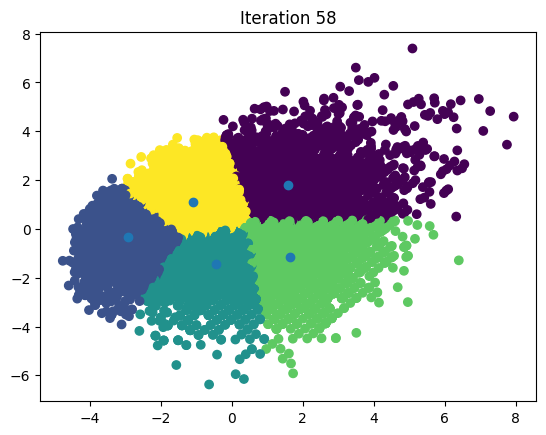

In [62]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(df, centroids)
    centroids = get_new_centroidS(df, labels, centroid_count)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

In [63]:
centroids

,0,1,2,3,4
overall,6.484409,2.503032,4.011914,5.305913,4.328121
potential,6.800155,4.455514,4.016291,4.950001,5.912348
value_eur,1.457804,1.013544,1.026961,1.061776,1.063587
wage_eur,1.688172,1.015908,1.045248,1.178221,1.074859
age,4.029306,2.272253,4.487395,5.931729,2.659796


In [64]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [65]:
km.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [68]:
algo_centroids=km.cluster_centers_

In [70]:
algo_centroids

array([[4.92732572, 6.09420695, 1.09536816, 1.14784281, 3.12973309],
       [4.25081889, 4.07308768, 1.02778217, 1.05294596, 5.05770552],
       [7.10442133, 7.31734774, 1.92810257, 2.30156517, 4.30849509],
       [2.98417673, 4.83894464, 1.01910858, 1.02115923, 2.45848008],
       [5.71980744, 5.36109353, 1.09222597, 1.28325495, 6.05515118]])